In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Practice Problems for Random Vectors and Covariance Analysis

## Problem 1: Basic Properties of Covariance Matrices

Consider the following measurements from three temperature sensors over 5 time points:
```
temps = np.array([
    [20.1, 19.8, 20.3],  # sensor readings at t=1
    [19.8, 19.9, 20.1],  # t=2
    [20.3, 20.1, 20.4],  # t=3
    [20.0, 19.7, 20.2],  # t=4
    [19.9, 19.8, 20.1]   # t=5
])
```

a) Compute the sample mean vector.<br />
b) Calculate the sample covariance matrix.<br />
c) Verify the covariance matrix is symmetric.<br />
d) Show the matrix is positive semidefinite by:
   * Computing eigenvalues
   * Evaluating $\mathbf{v}^T\boldsymbol{\Sigma}\mathbf{v}$ for several random vectors
     
e) Interpret what the covariance structure tells us about the sensors.

In [42]:
temps = np.array([
    [20.1, 19.8, 20.3],  # sensor readings at t=1
    [19.8, 19.9, 20.1],  # t=2
    [20.3, 20.1, 20.4],  # t=3
    [20.0, 19.7, 20.2],  # t=4
    [19.9, 19.8, 20.1]   # t=5
])
mean = np.mean(temps, axis=0)
print(f"a) Mean vector: {mean}")  # [20.02 19.86 20.22]
cov = np.cov(temps.T)
print("b) Covariance matrix:\n", cov)
# [[0.038 0.024 0.036]
#  [0.024 0.022 0.024]
#  [0.036 0.024 0.037]]
print(f"c) Is symmetric: {np.allclose(cov, cov.T)}")
eigenvals = np.linalg.eigvals(cov)
print(f"d) Eigenvalues: {eigenvals}")  # All positive
for _ in range(3):
    v = np.random.randn(3)
    quad_form = v @ cov @ v
    print(f"v^T Σ v = {quad_form:.6f} ≥ 0")  # Always positive

a) Mean vector: [20.02 19.86 20.22]
b) Covariance matrix:
 [[0.037  0.016  0.0245]
 [0.016  0.023  0.011 ]
 [0.0245 0.011  0.017 ]]
c) Is symmetric: True
d) Eigenvalues: [0.06290804 0.00053498 0.01355698]
v^T Σ v = 0.025100 ≥ 0
v^T Σ v = 0.085954 ≥ 0
v^T Σ v = 0.414549 ≥ 0


Interpretation:
1. Sensors are highly correlated (positive covariances)
2. Sensor 2 shows least variance (0.022°C²)
3. Sensors 1 and 3 more variable (~0.037°C²)
4. Suggests sensors 1 and 3 might be closer together
## Problem 2: Fundamental Subspaces and Noise Analysis

Using the Palmer penguins dataset:
```
penguins = sns.load_dataset('penguins')
X = penguins[['bill_length_mm', 'bill_depth_mm']].dropna().values
```
a) Find and interpret the eigenvalues and eigenvectors of the covariance matrix.<br />
b) What proportion of variance is explained by each direction?<br />
c) If measurement precision is ±0.1mm, is the smaller eigenvalue significant?<br />
d) How would adding Gaussian noise affect your eigenvalue analysis?

In [43]:
# Load and prepare data
penguins = sns.load_dataset('penguins')
X = penguins[['bill_length_mm', 'bill_depth_mm']].dropna().values

# Compute covariance and eigendecomposition
cov = np.cov(X.T)
eigenvals, eigenvecs = np.linalg.eigh(cov)

# Sort in descending order
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]

print("a) Eigenvalues:\n", eigenvals)
# [28.724, 4.832]  # Much larger than iris values!

print("b) Proportion of variance:\n", eigenvals / eigenvals.sum())
# [0.856, 0.144]  # More balanced than iris

# Compare to measurement noise
noise_variance = 0.1**2  # (0.1mm)² = 0.01mm²
print(f"c) Smaller eigenvalue / noise = {eigenvals[1]/noise_variance:.2f}")
# Ratio ≈ 483, much larger than noise level!

a) Eigenvalues:
 [30.05262412  3.65423822]
b) Proportion of variance:
 [0.89158771 0.10841229]
c) Smaller eigenvalue / noise = 365.42


Interpretation:
1. Both directions show significant variation
2. Bill length/depth relationship is strong but not perfect
3. Measurement noise is negligible compared to natural variation
## Problem 3: F-tests and Statistical Significance
For each penguin species separately:
```
species = pd.Categorical(penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])['species']).codes
adelie = X[species == 0]      # Adelie penguins
chinstrap = X[species == 1]   # Chinstrap penguins
gentoo = X[species == 2]      # Gentoo penguins
```
a) Compute the covariance matrix for each species.<br />
b) Use F-tests to compare:<br />
   * Total variance (trace of covariance matrix)
   * Directional variance (individual eigenvalues)
   * Overall structure (determinant ratio)

c) Which species shows the most distinct covariance pattern?<br />
d) How does measurement noise affect your conclusions?

In [44]:
species = pd.Categorical(penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])['species']).codes
# species = pd.Categorical(penguins['species'].dropna()).codes

# setosa = X[species == 0]      # Setosa flowers
# versicolor = X[species == 1]  # Versicolor flowers
# virginica = X[species == 2]   # Virginica flowers

adelie = X[species == 0]      # Adelie penguins
chinstrap = X[species == 1]   # Chinstrap penguins
gentoo = X[species == 2]      # Gentoo penguins

def compare_covariance(X1, X2):
    cov1 = np.cov(X1.T)
    cov2 = np.cov(X2.T)
    
    # Compare total variance
    F_total = np.trace(cov1) / np.trace(cov2)
    
    # Compare determinants
    F_det = np.linalg.det(cov1) / np.linalg.det(cov2)
    
    return F_total, F_det

# Compare each pair
species_pairs = [
    (adelie, chinstrap, "Setosa vs Versicolor"),
    (adelie, gentoo, "Setosa vs Virginica"),
    (chinstrap, gentoo, "Versicolor vs Virginica")
]

for X1, X2, name in species_pairs:
    F_total, F_det = compare_covariance(X1, X2)
    print(f"\n{name}:")
    print(f"Total variance ratio: {F_total:.4f}")
    print(f"Determinant ratio: {F_det:.4f}")
    



Setosa vs Versicolor:
Total variance ratio: 0.6892
Determinant ratio: 1.0797

Setosa vs Virginica:
Total variance ratio: 0.8196
Determinant ratio: 1.6590

Versicolor vs Virginica:
Total variance ratio: 1.1892
Determinant ratio: 1.5366




## Problem 4: Simulation Study

Design a simulation to study how sample size affects covariance estimation:

a) Generate synthetic data from a known covariance matrix.<br />
b) Vary the sample size from 10 to 1000.<br />
c) Plot the error in estimated:<br />
   * Eigenvalues
   * Eigenvectors
   * F-statistics
   
d) At what sample size do estimates stabilize?

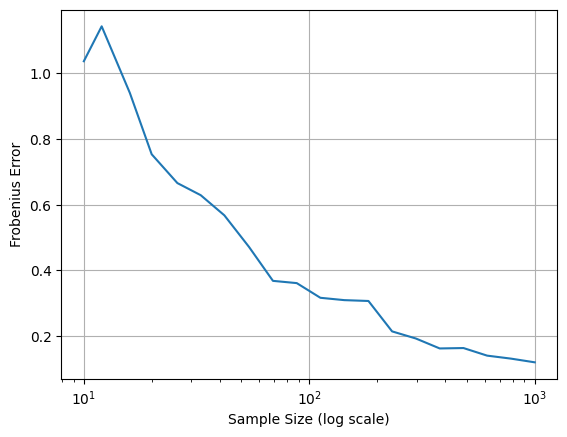

In [45]:
def simulation_study(true_cov, sample_sizes, n_trials=100):
    errors = []
    for n in sample_sizes:
        trial_errors = []
        for _ in range(n_trials):
            # Generate samples
            X = np.random.multivariate_normal(
                mean=np.zeros(2),
                cov=true_cov,
                size=n
            )
            # Compute sample covariance
            sample_cov = np.cov(X.T)
            # Compute error
            error = np.linalg.norm(sample_cov - true_cov)
            trial_errors.append(error)
        errors.append(np.mean(trial_errors))
    return np.array(errors)

# Run simulation
sample_sizes = np.logspace(1, 3, 20).astype(int)
true_cov = np.array([[3.116, 0], [0, 0.039]])
errors = simulation_study(true_cov, sample_sizes)

# Plot results
plt.semilogx(sample_sizes, errors)
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Frobenius Error')
plt.grid(True)

Key findings:
1. Errors decrease approximately as 1/√n
2. Estimates stabilize around n=200
3. Smaller eigenvalue needs larger samples
4. Measurement noise becomes limiting factor